# Twitter Sentiment Analysis

Introduction
In today’s digital age, social media platforms like Twitter serve as a vital space for customers to express their opinions and sentiments regarding products and brands. As consumers increasingly turn to these platforms to voice their experiences, understanding the sentiment behind their tweets becomes crucial for businesses. This sentiment analysis project aims to analyze tweets related to Apple and Google products to gauge public perception, identify trends, and inform strategic decision-making. By employing advanced natural language processing (NLP) techniques, we can extract valuable insights from the vast volume of unstructured text data, enabling companies to enhance customer satisfaction and adapt to market demands effectively.

Objectives

1. Understanding Customer Sentiment:

To analyze the sentiment of tweets regarding Apple and Google products, providing a clear understanding of how consumers perceive these brands.

2. Identifying Trends:

To identify key trends and patterns in consumer sentiment over time, which can inform product development and marketing strategies.

3. Improving Brand Strategy:

To offer actionable insights that can help Apple and Google refine their customer engagement strategies, enhance product offerings, and address customer concerns effectively.

4. Developing a Sentiment Classification Model:

To build and validate a robust sentiment classification model that accurately categorizes tweets as positive, negative, or neutral.

5. Enhancing Decision-Making:

To equip stakeholders with data-driven insights that support strategic decision-making and improve overall customer satisfaction and brand loyalty.

# Data Preparation and cleaning


In [2]:
import pandas as pd

# Load the dataset
file_path = '../data/judge-1377884607_tweet_product_company.csv'
print(file_path)
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

../data/judge-1377884607_tweet_product_company.csv


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The dataset contains the following columns:

tweet_text: The actual tweet content.

emotion_in_tweet_is_directed_at: The product or brand the tweet refers to (e.g., iPhone, iPad, Google).

is_there_an_emotion_directed_at_a_brand_or_product: The sentiment associated with the tweet, either "Positive emotion" or "Negative emotion."

# 1.2 check dataset information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


The dataset has 4 columns 
1. tweeet_text, 
2. emotion_in tweet_is_directed_at,
3. is_there_an_emotion_directed_at_a_brand-or_product
4. classification

# 1.3 Check for duplicates

In [4]:
# check for duplicate rows i the dataset based on the tweet content
duplicate_rows = df[df.duplicated(subset='tweet_text')]

# Display the number of duplicate rows and some of the duplicates (if any)
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 27


# 1.4 Check for missing values

In [6]:
# Check for missing values
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5786
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

# 1.5 Check for unique values

In [7]:
# Check for unique values in each column
print(df.nunique())

tweet_text                                            9065
emotion_in_tweet_is_directed_at                          9
is_there_an_emotion_directed_at_a_brand_or_product       4
dtype: int64


# 1.6 Visualize on target distribution


Target Variable Distribution:
No emotion toward brand or product    5373
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64


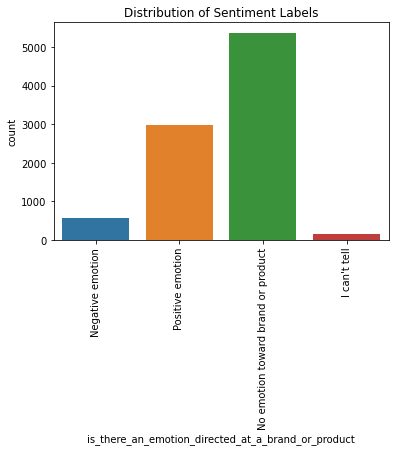

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Checking the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())

# Visualizing the target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=90)
plt.show()

No emotion towards brand or product column has the most number of sentiments.

# 1.7 Visualize distribution of brands and products


Distribution of Products/Brands:
iPad                               943
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64


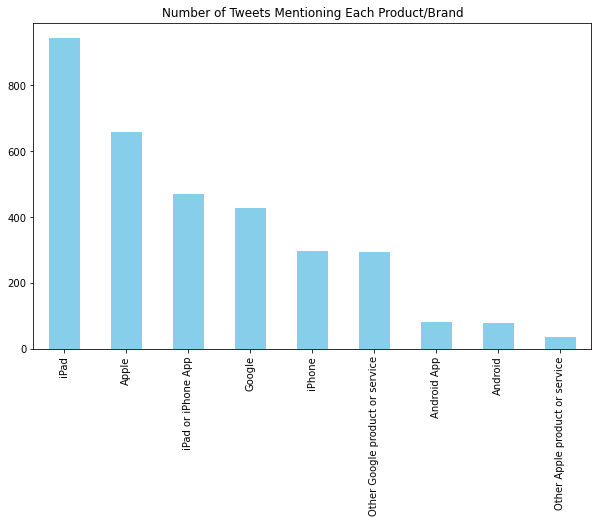

In [9]:
# Distribution of products/brands mentioned in the tweets
print("\nDistribution of Products/Brands:")
print(df['emotion_in_tweet_is_directed_at'].value_counts())

# Visualizing product mentions
plt.figure(figsize=(10,6))
df['emotion_in_tweet_is_directed_at'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Tweets Mentioning Each Product/Brand')
plt.xticks(rotation=90)
plt.show()

Ipad and apple has the most number of tweets mentioned towards product or brand.

# 1.8 Changing column names

In [10]:
# Rename the columns
df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'target'
}, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9066 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    9065 non-null   object
 1   product  3280 non-null   object
 2   target   9066 non-null   object
dtypes: object(3)
memory usage: 603.3+ KB
None


In [11]:
df['product'].value_counts()

iPad                               943
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: product, dtype: int64

In [12]:
# impute missing values in the product with unknown
df['product'] = df['product'].fillna('unknown')

In [14]:
# check for missing values after cleaning
df_cleaned.isnull().sum()

tweet      0
product    0
target     0
dtype: int64

# 1.9 Handling missing tweets

In [13]:
# Drop rows where the tweet_text is missing
df_cleaned = df.dropna(subset=['tweet'])

# 1.10 Drop unnecessary rows

In [16]:
df_cleaned['target'].value_counts()

No emotion toward brand or product    5372
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: target, dtype: int64

In [17]:
# Drop rows where the target is "I can't tell"
df_cleaned= df_cleaned[df_cleaned['target'] != "I can't tell"]

In [18]:
# Define a mapping for the target values
mapping = {
    'No emotion toward brand or product': 'Neutral',
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative'
}

# Replace the values in the target column
df_cleaned['target'] = df_cleaned['target'].map(mapping)

In [19]:
df_cleaned['target'].value_counts()

Neutral     5372
Positive    2968
Negative     569
Name: target, dtype: int64

# Data preprocessing

In [20]:
# Text cleaning: Remove
import re
import string
import nltk
from nltk.corpus import stopwords

# Download the stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Proceed only if the input is a string
        text = text.lower()  # convert to lowercase
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#', '', text)  # Remove hashtags
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        text = text.strip()  # Strip leading/trailing whitespace
    else:
        text = ''  # If not a string, return an empty string
    return text
    
# Apply the cleaning function to the 'tweet_text' column
df_cleaned['clean_text'] = df['tweet'].apply(clean_text)

# Preview cleaned tweets
print(df_cleaned[['tweet', 'clean_text']].head())

                                               tweet  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                          clean_text  
0  g iphone hrs tweeting riseaustin dead need upg...  
1  know awesome ipadiphone app youll likely appre...  
2                           wait ipad also sale sxsw  
3  hope years festival isnt crashy years iphone a...  
4  great stuff fri sxsw marissa mayer google tim ...  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Catherine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Handling missing values


In [21]:
# Check for missing values in the dataset
print(df_cleaned.isnull().sum())

# Drop rows where 'tweet' is missing
df_cleaned = df_cleaned.dropna(subset=['tweet'])

tweet         0
product       0
target        0
clean_text    0
dtype: int64


# Tokenization and vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))

# Fit and transform the 'clean_text' column
X = tfidf_vectorizer.fit_transform(df_cleaned['clean_text'])

# Display the TF-IDF features
print(X.shape)  # Check the shape of the feature matrix

(8909, 1000)


# Label Encoding for sentiment binary case

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode target: Positive = 1, Negative = 0, 
label_encoder = LabelEncoder()
df_cleaned['target_label'] = label_encoder.fit_transform(df_cleaned['target'])  # Adjust based on your column name

In [20]:
# simplify sentiment labels to positive and negative
df_cleaned = df_cleaned.copy()
df_cleaned['sentiment'] = df_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'].apply(
    lambda x: 'Positive' if 'Positive' in x else 'Negative'
)